# Исследование на тему: "Стратегия удержания клиентов в сети фитнес-центров"

### Цели:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - 1) выделить целевые группы клиентов;
    - 2) предложить меры по снижению оттока;
    - 3) определить другие особенности взаимодействия с клиентами.

### Описание проекта:

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.

### Ход исследования:

**Шаг 1. Загрузка данных**

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. **Набор данных включает следующие поля:**

- 'Churn' — факт оттока в текущем месяце;
    
**Текущие поля в датасете:**

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Путь к файлу: /datasets/gym_churn.csv. 

**Шаг 2. Проведение исследовательского анализа данных (EDA)**

- Посмотреть на датасет: есть ли в нем отсутствующие признаки, изучить средние значения и стандартные отклонения (пригодится метод describe());
- Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользоваться методом groupby());
- Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Построить матрицу корреляций и отобразить её.

**Шаг 3. Построить модель прогнозирования оттока клиентов**

Построить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

- Разбить данные на обучающую и валидационную выборку функцией train_test_split().
- Обучить модель на train-выборке двумя способами:
    - логистической регрессией,
    - случайным лесом.
- Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Какая модель показала себя лучше на основании метрик? 

P.S. Не забыть указать параметр random_state при разделении выборки и задании алгоритма.

**Шаг 4. Сделать кластеризацию клиентов**

Отложить в сторону столбец с оттоком и провести кластеризацию объектов (клиентов):

- Стандартизировать данные.
- Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположить, какое количество кластеров можно выделить.
- Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов. Договоримся за число кластеров принять n=5.
- Посмотреть на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитать долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

**Шаг 5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами**

- Сформулировать основные выводы и предложить рекомендации для стратегии взаимодействия с клиентами и их удержания.
- Не описывать стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

[Содержание:](#content)
<a id='content'></a>

[Шаг №1. Загрузка данных](#start)
    
[Шаг №2. Проведение исследовательского анализа данных (EDA)](#analys) 
1. [Посмотреть на датасет: есть ли в нем отсутствующие признаки, изучить средние значения и стандартные отклонения (пригодится метод describe()).](#analys1)
2. [Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользоваться методом groupby()).](#analys2)
3. [Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#analys3)
4. [Построить матрицу корреляций и отобразить её](#analys4)

[Шаг №3. Построить модель прогнозирования оттока клиентов](#prognos)
1. [Разбить данные на обучающую и валидационную выборку функцией train_test_split()](#prognos1)
2. [Обучить модель на train-выборке двумя способами:](#prognos2)
    - 2.1. логистической регрессией
    - 2.2. случайным лесом
3. [Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Какая модель показала себя лучше на основании метрик?](#prognos3)  

[Шаг №4. Сделать кластеризацию клиентов](#claster)
1. [Стандартизировать данные.](#claster1)
2. [Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположить, какое количество кластеров можно выделить.](#claster2)
3. [Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов. Договоримся за число кластеров принять n=5.](#claster3)
4. [Посмотреть на средние значения признаков для кластеров. Можно ли сразу что-то заметить?](#claster4)
5. [Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?](#claster5)
6. [Для каждого полученного кластера посчитать долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?](#claster6)

[Шаг №5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами. Сформулировать основные выводы и предложить рекомендации для стратегии взаимодействия с клиентами и их удержания. Не описывать стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.](#conclusions)

---

[Шаг №1. Загрузка данных](#start)
<a id='start'></a>    

Импортируем полезные инструменты

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Отключим ненужные предупреждения Питона

In [2]:
import warnings
warnings.filterwarnings('ignore')

Сбросим ограничения на демонстрацию количества столбцов, зададим максималное количество символов в каждой строке, а также округлим выведение значений типа float до двух знаков после запятой.

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 80)
pd.options.display.float_format = '{:,.2f}'.format

Отключим автоматический скролл

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Откроем файл с таблицей

In [5]:
df = pd.read_csv('gym_churn.csv')
df.head() #Выведем пять первых строк таблицы

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


In [6]:
df.tail()#...и пять последних строк

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.41,12.00,8,2.28,2.35,0
3996,0,1,0,0,1,1,1,29,68.88,1.00,1,1.28,0.29,1
3997,1,1,1,1,1,12,0,28,78.25,11.00,2,2.79,2.83,0
3998,0,1,1,1,1,6,0,32,61.91,5.00,3,1.63,1.60,0
3999,1,0,1,0,0,12,1,30,178.86,12.00,1,1.10,1.04,0


Перед тем, как заняться предобработкой данных, ознакомимся с описанием данных и более детальной информацией о них.

**Набор данных включает следующие поля:**

- 'Churn' — факт оттока в текущем месяце;
    
**Текущие поля в датасете:**

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Ознакомимся с информацией о датасете методом info():

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Метод info() не продемонстрировал пропусков значений. Перепроверим, на всякий случай, методом isnull():

In [8]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Проверим таблицу на наличие дубликатов:

In [9]:
df.duplicated().sum()

0

Посмотрим ещё раз на названия столбцов

In [10]:
df.columns.tolist()

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month',
 'Churn']

Для удобства дальнейшей работы переведём названия столбцов в нижний регистр.

In [11]:
df.columns = [i.lower() for i in df]

In [12]:
df.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [13]:
df.shape

(4000, 14)

Итого, в представленной таблице:
- 14 колонок с 4000 наблюдений;
- типы данных столбцов представленной таблицы соответствуют содержащимся в них данным (многие праматеры могут быть булевыми, но для удобства дальнейших рассчётов оставим их целочисленными);
- пропуски значений в таблице не обнаружены;
- дубликаты не обнаружены;
- названия столбцов адекватно отображают своё содержимое - для удобства дальнейшей работы с ними переведены в нижний регистр.
- в дальнейшей работе будем исходить из предположения о том, что: 
    - в столбце gender 0 == женщина, 1 == мужчина;
    - во всех остальных ситуациях с бинарным распределением будем исходить из того, что 0 подразумевает False, а 1 - True.

Предварительный вывод: на этапе загрузки и предобработки данных не обнаружено сдерживающих факторов, препятствующих дальнейшей работе с таблицей.

---

[К содержанию](#content)

[Шаг №2. Проведение исследовательского анализа данных (EDA)](#analys) 
<a id='analys'></a>

1. [Посмотреть на датасет: есть ли в нем отсутствующие признаки, изучить средние значения и стандартные отклонения (пригодится метод describe()).](#analys1)
<a id='analys1'></a>

In [14]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Ещё раз вспомним обозначения столбцов:

**Набор данных включает следующие поля:**

- 'Churn' — факт оттока в текущем месяце;
    
**Текущие поля в датасете:**

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Предварительный вывод: в среднем сеть фитнес-центров посещает примерно равное число мужчин и женщин. Средний возраст посетителей 29 лет (разброс от 18 лет до 41 года). Если исходить из того, что в бинарном распределении среднее значение равное единице составит 100 %, то средний отток в текущей таблице составляет 27 %. 

[К содержанию](#content)

2. [Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользоваться методом groupby()).](#analys2)
<a id='analys2'></a>

In [15]:
df.groupby('churn').describe().T.reset_index().query('level_1 == "mean"')\
.set_index('level_0').drop(['level_1'], axis = 1)

churn,0,1
level_0,,
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08


Как видим, средние значения признаков у ушедших и оставшихся не отличаются принципиально. 
Есть, однако, ряд отличий, которые стоило бы упомянуть. Портрет среднестатистического "уходящего": покидает тренировки в первый месяц, посещает фитнес-центр нерегулярно (1, реже 2 раза в неделю), абонемент приобретает на месяц или три месяца. С меньшим энтузиазмом от "оставшихся" тратится на другие услуги фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

[К содержанию](#content)

3. [Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#analys3)
<a id='analys3'></a>

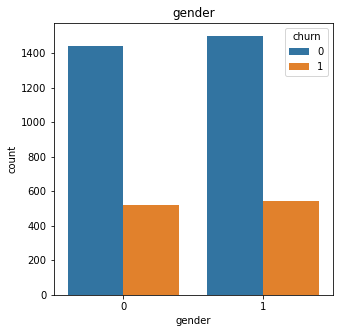

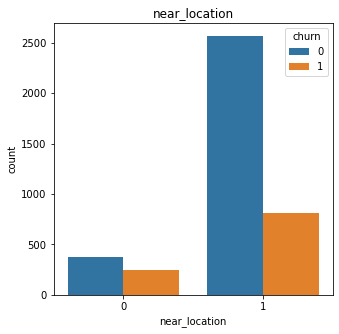

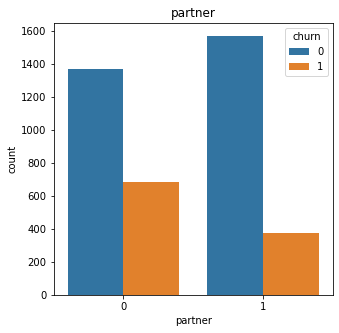

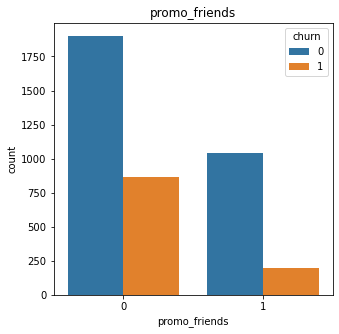

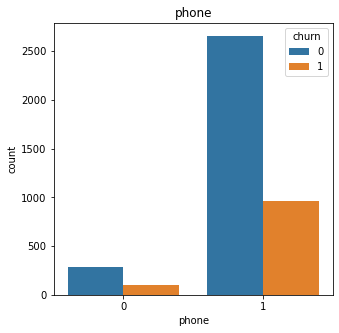

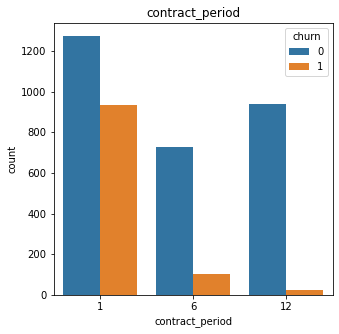

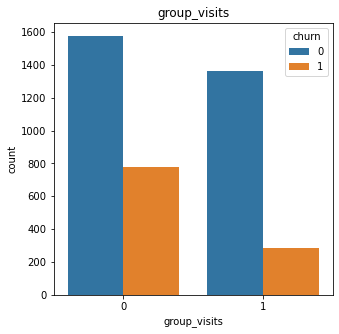

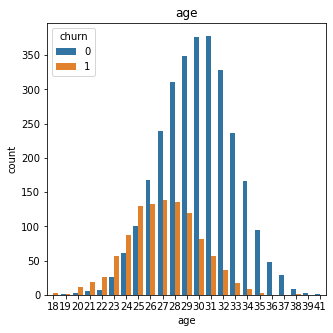

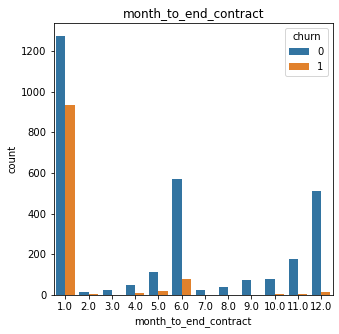

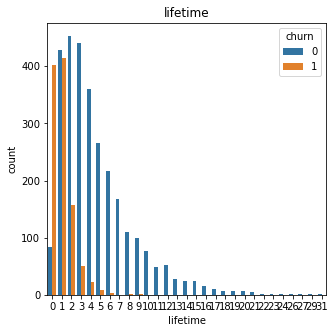

In [16]:
for column in ['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age','month_to_end_contract',
 'lifetime']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.show()

Как правило доля ушедших при отсутствии признака (не посещали группы, живут не рядом с клубом, не сотрудники компаний-партнёров и т.д.) почти в 2 раза выше, чем при наличии признака.
Доля оттока по признакам наличия телефона в базе и половой принадлежности существенных отличий от доли оставшихся не имеет.

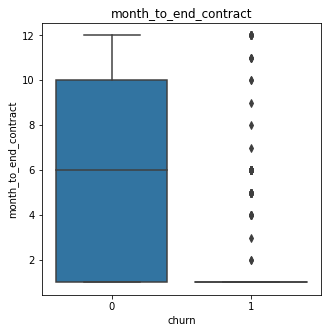

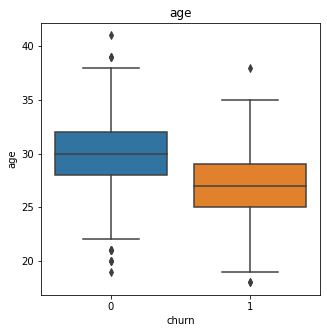

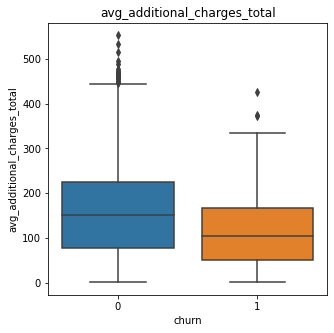

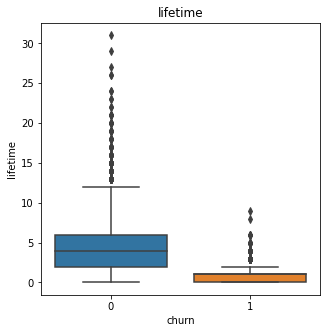

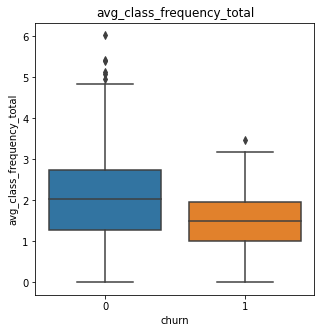

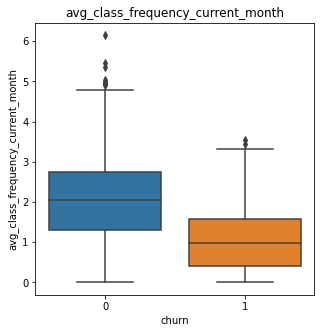

In [17]:
for column in ['month_to_end_contract', 
               'age', 
               'avg_additional_charges_total', 
               'lifetime', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'churn', y = df[column], data = df)
    plt.title(column)
    plt.show()

По количественным признакам оставшиеся имеют более высокие средние показатели и больший разброс в сторону увеличения значения признака.

[К содержанию](#content)

4. [Построить матрицу корреляций и отобразить её](#analys4)
<a id='analys4'></a>

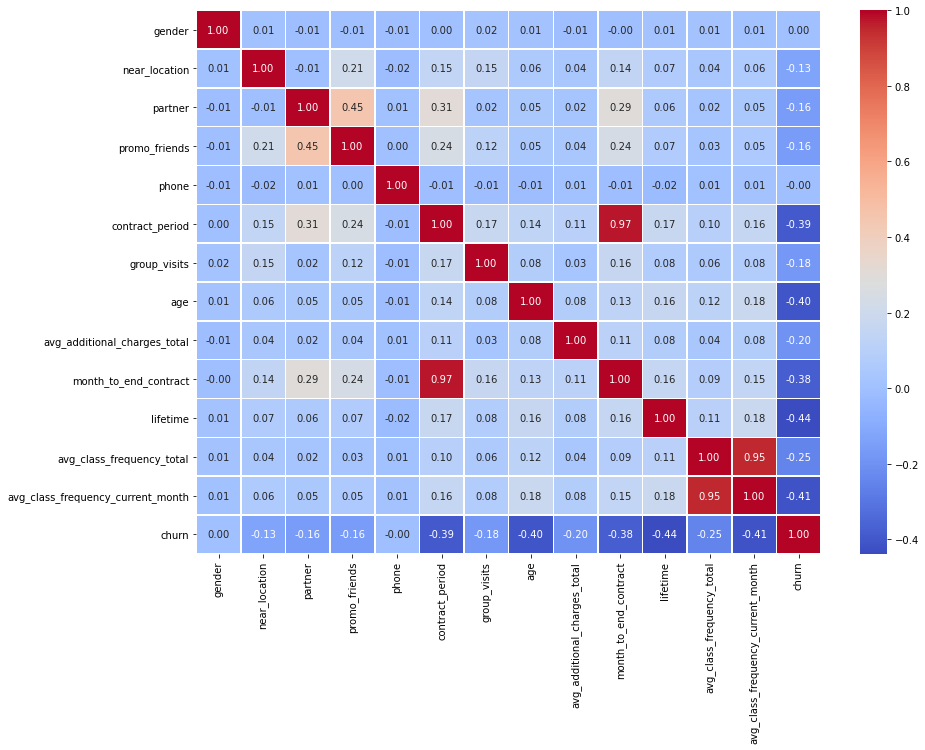

In [18]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="coolwarm")
plt.show()

Как уже было замечено выше, на отток влияют срок действия абонемента, частота посещений тренировок в неделю.Признаки с нулевой корреляцией с целевой переменной - пол и наличие контактного телефона , как и было замечено ранее.

[К содержанию](#content)

[Шаг №3. Построить модель прогнозирования оттока клиентов](#prognos)
<a id='prognos'></a>

1. [Разбить данные на обучающую и валидационную выборку функцией train_test_split()](#prognos1)
<a id='prognos1'></a>

In [19]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

In [20]:
# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

2. [Обучить модель на train-выборке двумя способами:](#prognos2)
<a id='prognos2'></a>

- логистической регрессией
- случайным лесом

#### Логистическая регрессия

In [21]:
#Воспользуемся алгоритмом для решения задачи бинарной классификации - логистическая регрессия.
model = LogisticRegression(solver='liblinear') #Отключим уведомления о будущем изменении солвера  

In [22]:
#Обучим модель
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [23]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [24]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


Доля верно угаданных ответов из всех прогнозов 93%. Однако, следует учесть, что балланс классов отсутствует, а значит, в прогнозах могут закрадываться ошибки. Согласно метрике точности (Precision), верность доли оттока составляет 86%. Метрика полноты (Recall) сообщает нам о том, что мы обнаружили 83% реальных объектов оттока.

#### Случайный лес

In [25]:
# обучение StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [26]:
# Преобразование обучающего и валидационного набора данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [27]:
# зададим алгоритм для модели логистической регрессии
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [28]:
# обучим модель
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [29]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [30]:
# выведем все метрики
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81


Доля верно угаданных ответов из всех прогнозов 92%. Однако, следует учесть, что балланс классов отсутствует, а значит, в прогнозах могут закрадываться ошибки. Согласно метрике точности (Precision), верность доли оттока составляет 84%. Метрика полноты (Recall) сообщает нам о том, что мы обнаружили 81% реальных объектов оттока.

[К содержанию](#content)

3. [Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Какая модель показала себя лучше на основании метрик?](#prognos3)
<a id='prognos3'></a>

Разница в метриках логистической регрессии и случайного леса составляет 1-2% в пользу логистической регрессии.

[К содержанию](#content)

[Шаг №4. Сделать кластеризацию клиентов](#claster)
<a id='claster'></a>

1. [Стандартизировать данные.](#claster1)
<a id='claster1'></a>

In [31]:
# обязательная стандартизация данных перед работой с алгоритмами
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

[К содержанию](#content)

2. [Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположить, какое количество кластеров можно выделить.](#claster2)
<a id='claster2'></a>

In [32]:
linked = linkage(df_sс, method = 'ward')

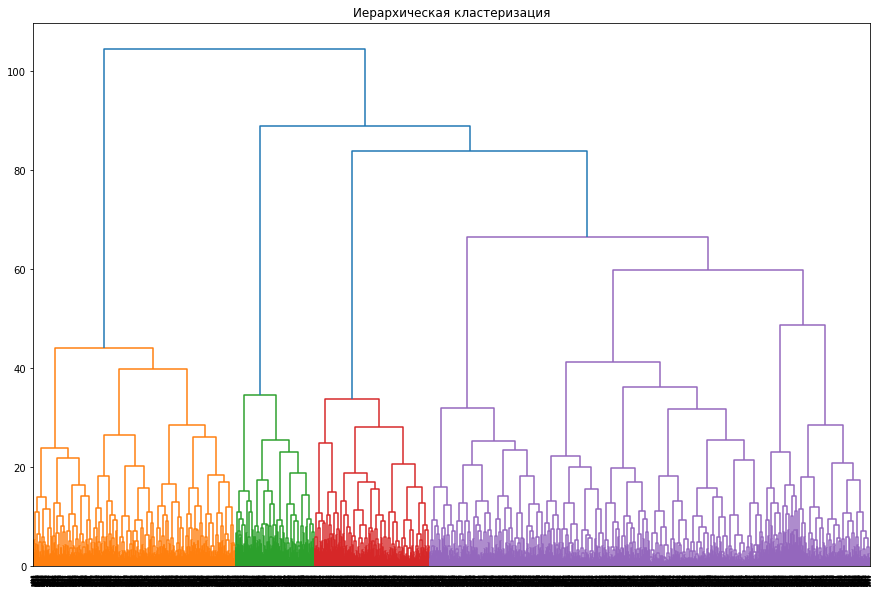

In [33]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

[К содержанию](#content)

3. [Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов. Договоримся за число кластеров принять n=5.](#claster3)
<a id='claster3'></a>

In [34]:
# задаём число кластеров, равное 5
km = KMeans(n_clusters = 5, random_state= 0)

# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(df_sс)

#формируем новую колонку в датасете
df['cluster'] = labels

In [35]:
df.cluster.value_counts()

1    1067
4     936
2     831
3     781
0     385
Name: cluster, dtype: int64

[К содержанию](#content)

4. [Посмотреть на средние значения признаков для кластеров. Можно ли сразу что-то заметить?](#claster4)
<a id='claster4'></a>

In [36]:
df.groupby(['cluster']).mean().reset_index().T

,0,1,2,3,4
cluster,0.00,1.00,2.00,3.00,4.00
gender,0.52,0.48,0.56,0.51,0.50
near_location,0.86,0.81,0.86,0.75,0.94
partner,0.47,0.00,0.34,1.00,0.75
promo_friends,0.31,0.09,0.20,0.45,0.54
phone,0.00,1.00,1.00,1.00,1.00
contract_period,4.79,1.87,2.73,2.55,11.35
group_visits,0.43,0.33,0.45,0.30,0.56
age,29.30,28.15,30.20,28.50,29.99
avg_additional_charges_total,143.96,131.37,164.58,129.81,164.56


**Набор данных включает следующие поля:**

- 'Churn' — факт оттока в текущем месяце;
    
**Текущие поля в датасете:**

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

  Наибольший отток демонстрирует кластер №3. Этот же кластер демонстрирует наименьшие показатели по:
  - средней частоте посещений в неделю за предыдущий месяц;
  - средней частоте посещений в неделю за все время с начала действия абонемента;
  - времени с момента первого обращения в фитнес-центр;
  - сроку до окончания текущего действующего абонемента;
  - суммарной выручке от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон;
  - возрасту - средний возраст 28 лет;
  - длительности текущего действующего абонемента;
  - сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
  
В добавок к этому представители кластера №3 живут в наибольшем удалении от клубов.

Наименьший отток показывают кластеры №0 и №4.

[К содержанию](#content)

5. [Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?](#claster5)
<a id='claster5'></a>

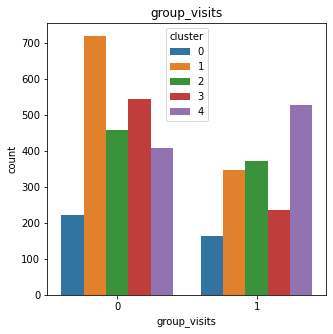

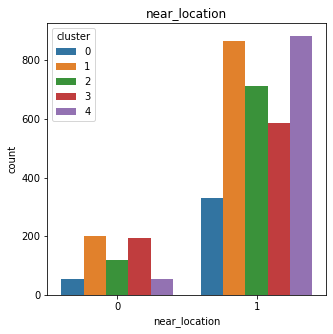

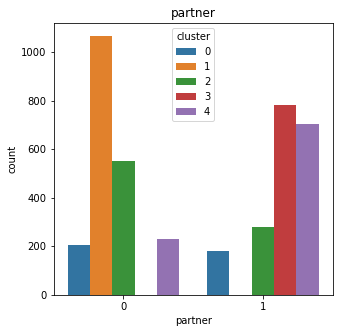

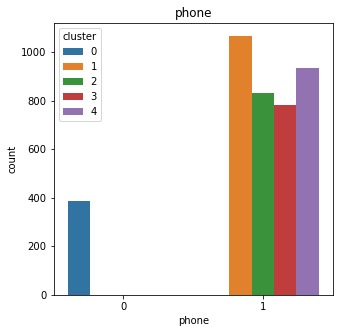

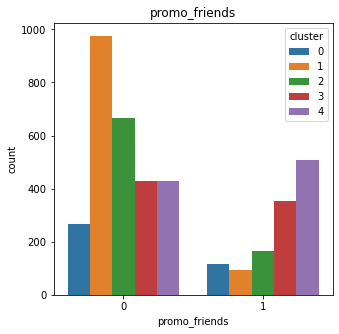

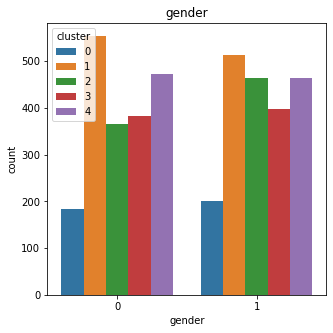

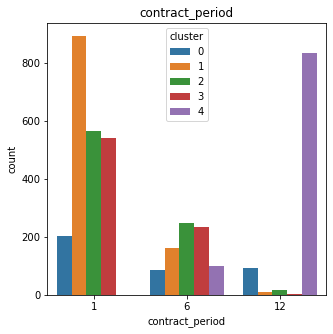

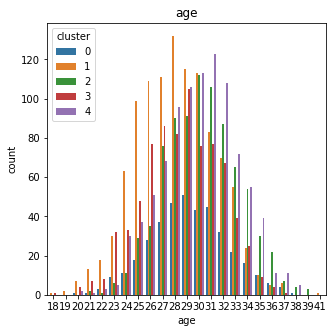

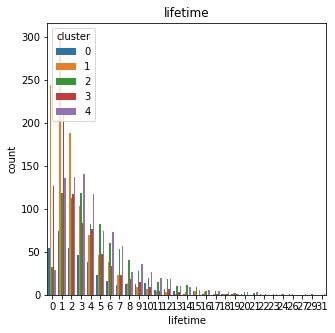

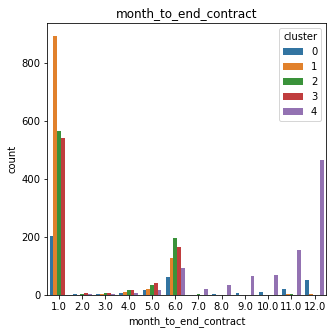

In [37]:
for column in ['group_visits', 'near_location', 'partner', 'phone', 'promo_friends', 'gender',
             'contract_period', 'age', 'lifetime', 'month_to_end_contract']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

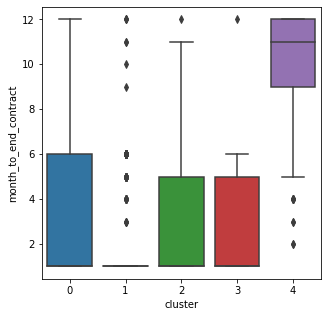

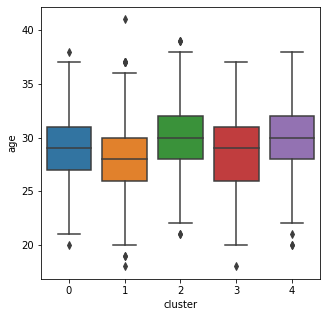

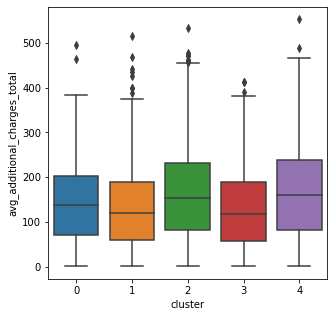

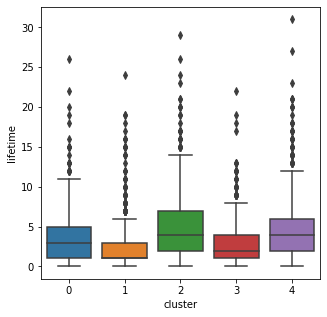

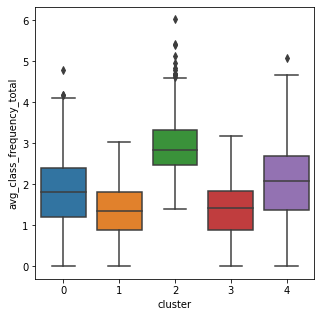

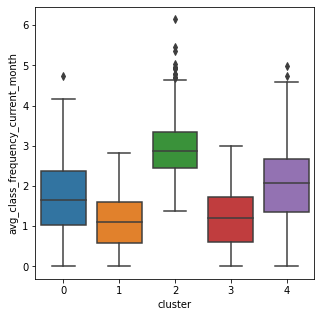

In [38]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

Тезисно:
- Отток тем выше, чем:
    - ниже факт посещения групповых занятий;
    - дальше от клуба клиент проживает;
    - реже факт первоначальной записи в рамках акции «приведи друга»;
- Графики также подтверждают вывод о клиентах из третьего кластера, сделанные ранее.    

[К содержанию](#content)

6. [Для каждого полученного кластера посчитать долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?](#claster6)
<a id='claster6'></a>

In [39]:
outflow_share = pd.DataFrame(df.groupby(['cluster'])['churn'].sum() /
                       df.groupby(['cluster'])['churn'].count() * 100).reset_index()

In [40]:
print ('Доля оттока:')
outflow_share

Доля оттока:


,cluster,churn
0,0,26.75
1,1,55.01
2,2,4.81
3,3,39.56
4,4,2.35


Как видим, представители кластера №3, в силу комплекса вышеобозначенных причин, демонстрируют 51% оттока из фитнес клубов. Также в группе риска находится кластер №2 - (44% оттока) - не мешало бы уделить его представителям более пристальное внимание, дабы не потерять. Наиболее надёжными кластерами в порядке значимости являются:
- №0
- №4

[К содержанию](#content)

[Шаг №5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами. Сформулировать основные выводы и предложить рекомендации для стратегии взаимодействия с клиентами и их удержания. Не описывать стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.](#conclusions)
<a id='conclusions'></a>

# Выводы

В представленной таблице:
- 14 колонок с 4000 наблюдений;
- типы данных столбцов представленной таблицы соответствуют содержащимся в них данным (многие праматеры могут быть булевыми, но для удобства дальнейших рассчётов оставим их целочисленными);
- пропуски значений в таблице не обнаружены;
- дубликаты не обнаружены;
- названия столбцов адекватно отображают своё содержимое - для удобства дальнейшей работы с ними переведены в нижний регистр.
- в дальнейшей работе будем исходить из предположения о том, что: 
    - в столбце gender 0 == женщина, 1 == мужчина;
    - во всех остальных ситуациях с бинарным распределением будем исходить из того, что 0 подразумевает False, а 1 - True.

Вывод: на этапе загрузки и предобработки данных не обнаружено сдерживающих факторов, препятствующих дальнейшей работе с таблицей.


В среднем сеть фитнес-центров посещает примерно равное число мужчин и женщин. Средний возраст посетителей 29 лет (разброс от 18 лет до 41 года). Если исходить из того, что в бинарном распределении среднее значение равное единице составит 100 %, то средний отток в текущей таблице составляет 27 %. 

Средние значения признаков у ушедших и оставшихся не отличаются принципиально. Есть, однако, ряд отличий, которые стоило бы упомянуть. Портрет среднестатистического "уходящего": покидает тренировки в первый месяц, посещает фитнес-центр нерегулярно (1, реже 2 раза в неделю), абонемент приобретает на месяц или три месяца. С меньшим энтузиазмом от "оставшихся" тратится на другие услуги фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Как правило доля ушедших при отсутствии признака (не посещали группы, живут не рядом с клубом, не сотрудники компаний-партнёров и т.д.) почти в 2 раза выше, чем при наличии признака. Доля оттока по признакам наличия телефона в базе и половой принадлежности существенных отличий от доли оставшихся не имеет.

По количественным признакам оставшиеся имеют более высокие средние показатели и больший разброс в сторону увеличения значения признака.

Как уже было замечено выше, на отток влияют срок действия абонемента, частота посещений тренировок в неделю. Признаки с нулевой корреляцией с целевой переменной - пол и наличие контактного телефона , как и было замечено ранее.

При обучении выборки алгоритмом логистической регрессии, было выявлено:
- Доля верно угаданных ответов из всех прогнозов 93%. Однако, следует учесть, что балланс классов отсутствует, а значит, в прогнозах могут закрадываться ошибки. Согласно метрике точности (Precision), верность доли оттока составляет 86%. Метрика полноты (Recall) сообщает нам о том, что мы обнаружили 83% реальных объектов оттока.

При обучении выборки алгоритмом случайный лес, было выявлено:
- Доля верно угаданных ответов из всех прогнозов 92%. Однако, следует учесть, что балланс классов отсутствует, а значит, в прогнозах могут закрадываться ошибки. Согласно метрике точности (Precision), верность доли оттока составляет 84%. Метрика полноты (Recall) сообщает нам о том, что мы обнаружили 81% реальных объектов оттока.

Разница в метриках логистической регрессии и случайного леса составляет 1-2% в пользу логистической регрессии.

В процессе класстеризации было выявлено:

Наибольший отток демонстрирует кластер №3. Этот же кластер демонстрирует наименьшие показатели по:
  - средней частоте посещений в неделю за предыдущий месяц;
  - средней частоте посещений в неделю за все время с начала действия абонемента;
  - времени с момента первого обращения в фитнес-центр;
  - сроку до окончания текущего действующего абонемента;
  - суммарной выручке от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон;
  - возрасту - средний возраст 28 лет;
  - длительности текущего действующего абонемента;
  - сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
  
В добавок к этому представители кластера №3 живут в наибольшем удалении от клубов.

Наименьший отток показывают кластеры №0 и №4.

Кроме того, отток тем выше, чем:
    - ниже факт посещения групповых занятий;
    - дальше от клуба клиент проживает;
    - реже факт первоначальной записи в рамках акции «приведи друга»;   
    
Как видим, представители кластера №3, в силу комплекса вышеобозначенных причин, демонстрируют 51% оттока из фитнес клубов. Также в группе риска находится кластер №2 - (44% оттока) - не мешало бы уделить его представителям более пристальное внимание, дабы не потерять. Наиболее надёжными кластерами в порядке значимости являются:
- №0
- №4

# Рекомендации

- Как демонстрируют данные, уходят чаще всего после первого месяца. Может быть имеет смысл новым клиентам дарить подарочный абонемент ещё на месяц вперёд, чтоб они "втянулись" в занятия.
- Нерегулярность посещения является фактором, приводящим к высоковероятному дальнейшему оттоку. Придумать бонусы за регулярность посещений?
- Чаще склонны к оттоку люди младше 28 лет. Может имеет смысл продумать систему поддержки более опытными спортсменами молодых, создать атмосферу сопричастности.